In [1]:
from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno as msno
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
sns.set_theme()

In [3]:
df_final = pd.read_csv('datasets/final_movies_dataset.csv')

In [4]:
df_final['release_date'] = pd.to_datetime(df_final['release_date'], format='%Y-%m-%d')

In [5]:
df_final.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,release_year,return
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,1995,12.45
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.04
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.00
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting To Exhale,6.1,34.0,1995,5.09
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father Of The Bride Part Ii,5.7,173.0,1995,0.00


<font size="4">Al importar el dataframe visualizamos sus columnas utilizando la función matrix de la librería "missingno" 
para generar una matriz de colores donde los espacios en blanco representan los valores faltantes. 
Esto nos  proporciona una pista sobre variables irrelevantes</font>

<AxesSubplot:>

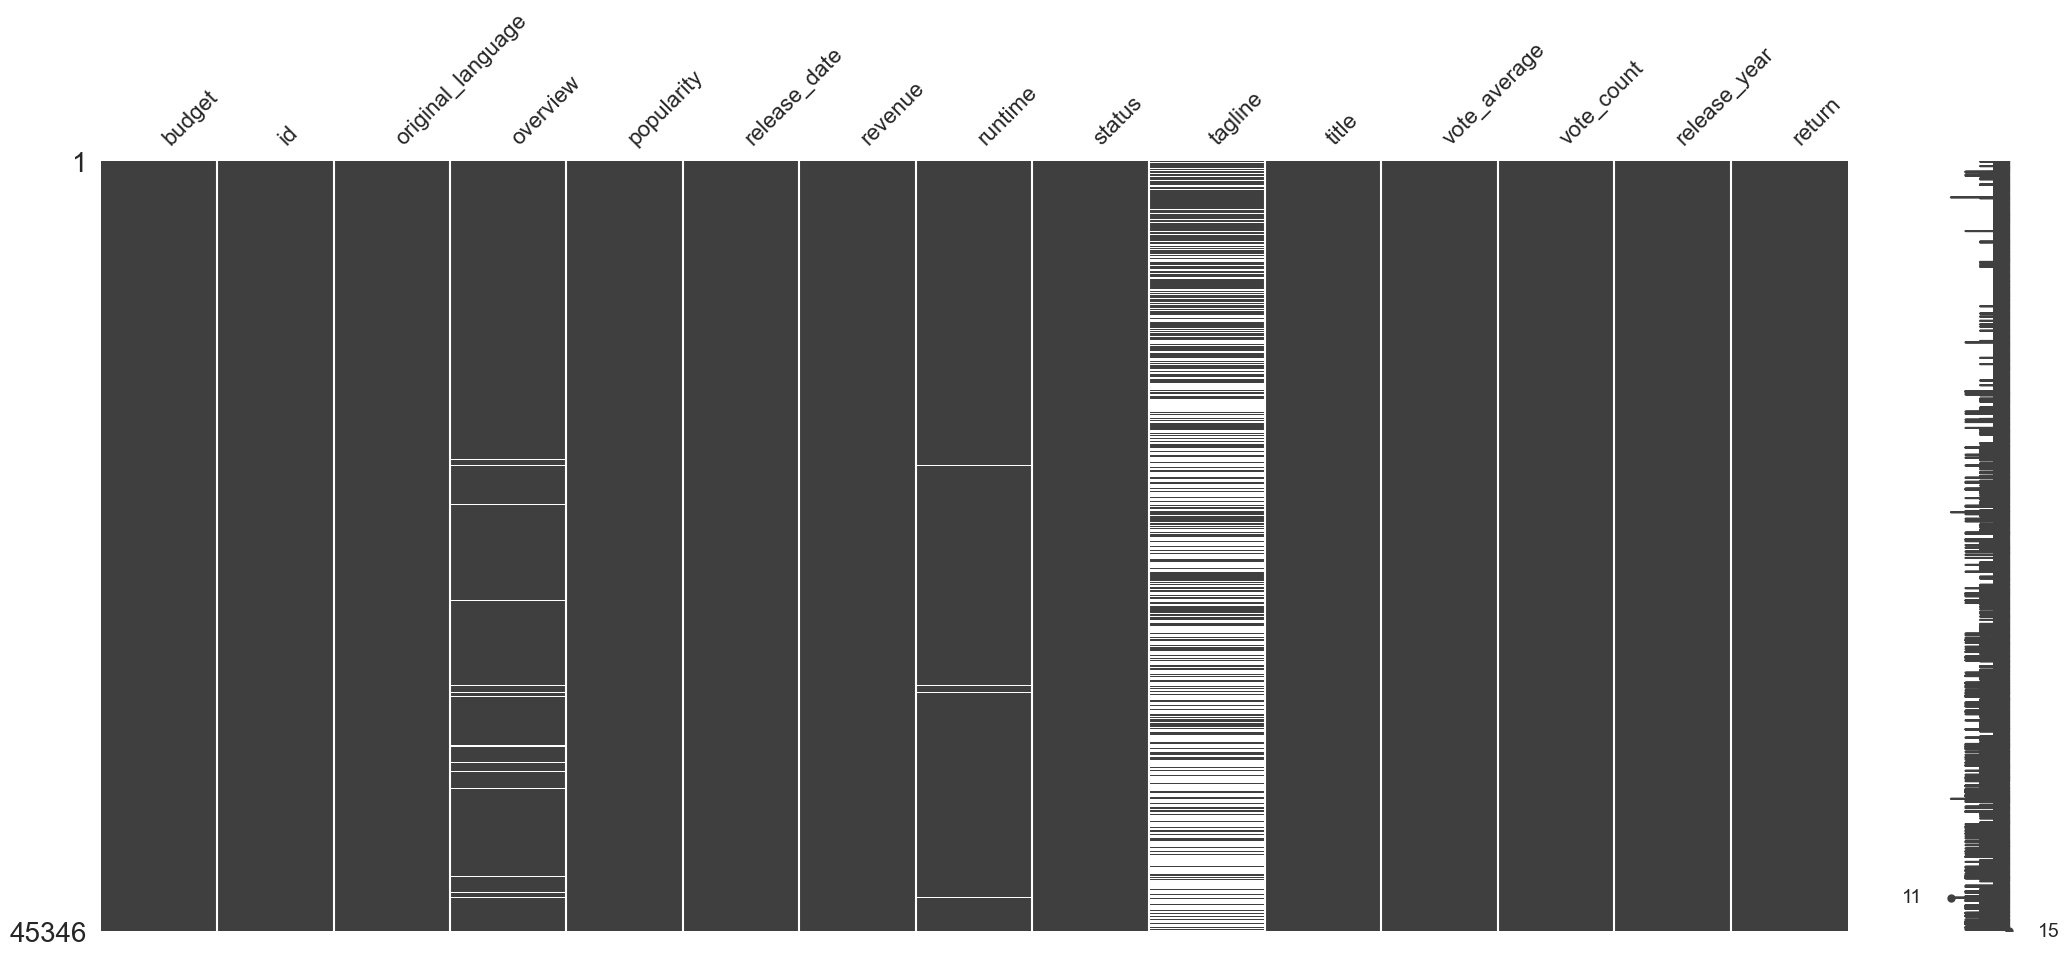

In [6]:
msno.matrix(df_final)

<font size="4">Para empezar este Análisis exploratorio de los datos (EDA) vamos a eliminar las variables que considero son
irrelevantes en este caso.</font>

In [7]:
df_final = df_final.drop(columns=['id', 'original_language','release_year','runtime', 'status','tagline'])

In [8]:
df_final

,budget,overview,popularity,release_date,revenue,title,vote_average,vote_count,return
0,30000000.0,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,12.45
1,65000000.0,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,4.04
2,0.0,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,Grumpier Old Men,6.5,92.0,0.00
3,16000000.0,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,Waiting To Exhale,6.1,34.0,5.09
4,0.0,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,Father Of The Bride Part Ii,5.7,173.0,0.00
...,...,...,...,...,...,...,...,...,...
45341,0.0,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,Robin Hood,5.7,26.0,0.00
45342,0.0,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,Century Of Birthing,9.0,3.0,0.00
45343,0.0,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,Betrayal,3.8,6.0,0.00
45344,0.0,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,Satan Triumphant,0.0,0.0,0.00


<font size="4">Se observa que del dataframe obtenido la única columna que tiene valores nulos es 'overview' lo cual tiene sentido 
porque no todas películas tendrán una descripción general.</font>

In [9]:
df_final.isnull().any()

budget          False
overview         True
popularity      False
release_date    False
revenue         False
title           False
vote_average    False
vote_count      False
return          False
dtype: bool

In [10]:
round(df_final.describe())

,budget,popularity,revenue,vote_average,vote_count,return
count,45346.0,45346.0,4.534600e+04,45346.0,45346.0,45346.0
mean,4232580.0,3.0,1.123366e+07,6.0,110.0,660.0
std,17443731.0,6.0,6.440990e+07,2.0,492.0,74718.0
min,0.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,0.0,0.0,0.000000e+00,5.0,3.0,0.0
50%,0.0,1.0,0.000000e+00,6.0,10.0,0.0
75%,0.0,4.0,0.000000e+00,7.0,34.0,0.0
max,380000000.0,547.0,2.787965e+09,10.0,14075.0,12396383.0


<font size="4">Debido a los avances tecnológicos y el crecimiento de la población, un análisis interesante sería ver cuantas películas
se han hecho a través de las décadas.</font>

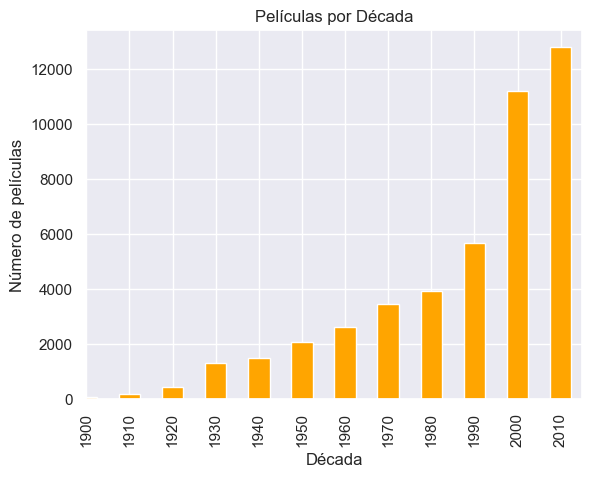

In [11]:
# Agrupamos los datos por década y se suman los valores correspondientes.
decadas = df_final['release_date'].dt.year // 10 * 10

agrupado = decadas.value_counts()

agrupado = agrupado.sort_values(ascending=True)


#Se crea la gráfica de barras
agrupado.plot(kind='bar',color= 'orange')


plt.xlabel('Década')
plt.ylabel('Número de películas')
plt.title('Películas por Década')

plt.xlim(left=4)


plt.show()

<font size="4">En el siguiente scatter plot se observa cierta relación positiva entre la cantidad de valoraciones y la popularidad de la película</font>

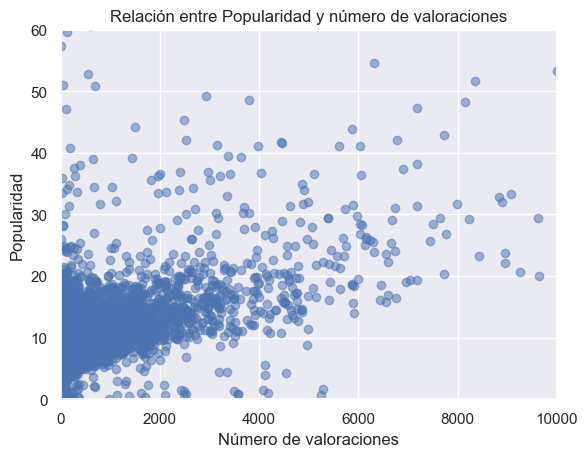

In [12]:
plt.scatter(df_final['vote_count'], df_final['popularity'], alpha=0.5)

# Personalizar el scatter plot
plt.title("Relación entre Popularidad y número de valoraciones")
plt.xlabel("Número de valoraciones")
plt.ylabel("Popularidad")

# Ajustes en el rango del eje x y el eje y
plt.xlim(0, 10000) 
plt.ylim(0, 60)

plt.show()

<font size="4">En el siguiete histograma podemos ver que la calificación más frecuente en este dataset se encuentra entre 5 y 7 </font>

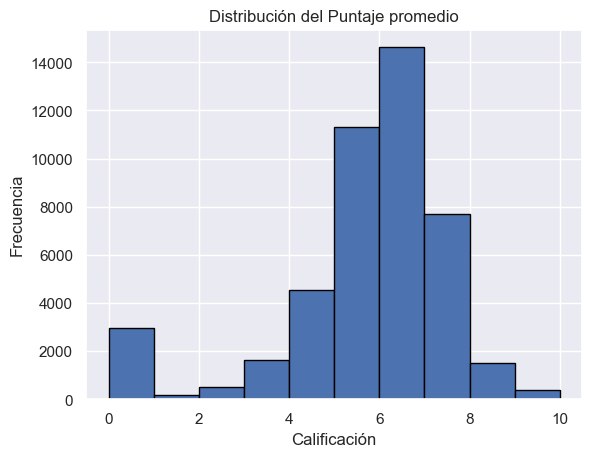

In [13]:
revenue_values = df_final['vote_average']

plt.hist(revenue_values, bins=10, edgecolor='black')

plt.title('Distribución del Puntaje promedio')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

plt.show()

<font size="4">Para este scatter plot se observa cierta correlación entre la inversión y la recaudación esto se hace más evidente entre mayor sea la invesión.</font>

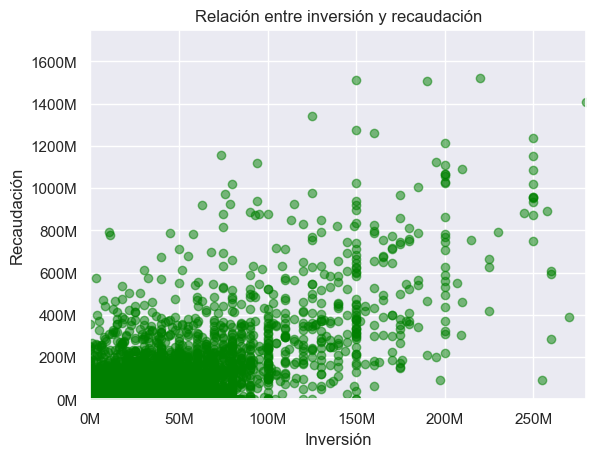

In [14]:
plt.scatter(df_final['budget'], df_final['revenue'], color='green', alpha=0.5)

# Crear un formateador para los ejes
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')

# Aplicamos el formateador a los ejes 'x' e 'y'
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Etiquetas y título
plt.xlabel('Inversión')
plt.ylabel('Recaudación')
plt.title('Relación entre inversión y recaudación')


plt.xlim(0, 280000000) 
plt.ylim(0, 1750000000)

# Mostrar el gráfico
plt.show()

<font size="4">En este gráfico de dispersión también observa una correlación entre la inversión y el número de valoraciones.</font>

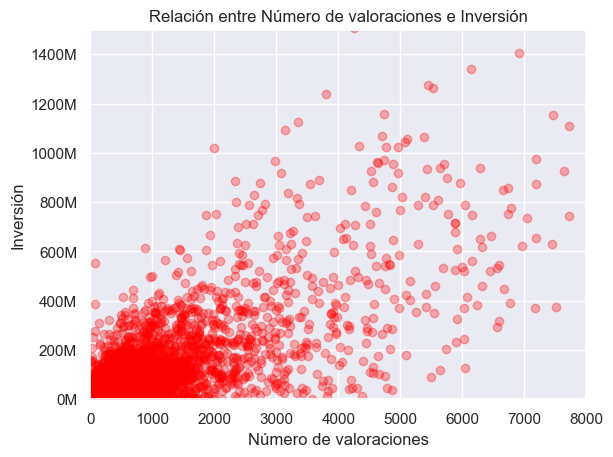

In [15]:
plt.scatter(df_final['vote_count'], df_final['revenue'], color='red', alpha=0.3)

# Crear un formateador para los ejes
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')

# Aplicamos el formateador a los ejes x e y

plt.gca().yaxis.set_major_formatter(formatter)

# Etiquetas y título
plt.xlabel('Número de valoraciones')
plt.ylabel('Inversión')
plt.title('Relación entre Número de valoraciones e Inversión')


plt.xlim(0, 8000) 
plt.ylim(0, 1500000000)

# Mostrar el gráfico
plt.show()

In [16]:
df_genres = pd.read_csv('datasets/data_genres.csv')

<font size="4"> Para nuestro siguiente análisis haremos uso del DataFrame anteriormente creado *'Genres'* y la librería de Seaborn para crear un Catplot donde podamos apreciar cómo se distribuye la cantidad de películas por cada género.</font>

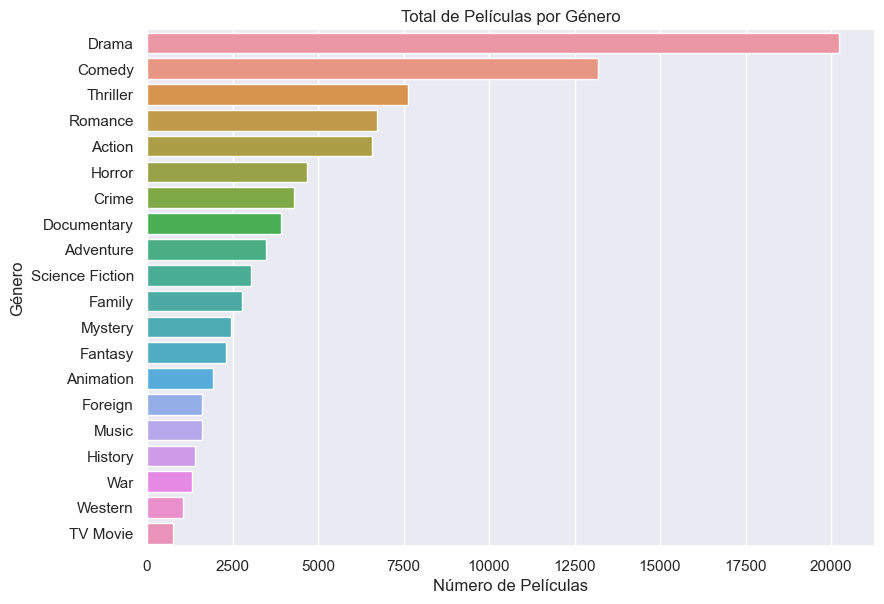

In [17]:
# Contamos el número de películas por género
genre_counts = df_genres['name'].value_counts()

# Creamos un nuevo DataFrame con los géneros y sus respectivos conteos
df_genre_counts = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

# Utilizamos seaborn para generar el Catplot
sns.catplot(data=df_genre_counts, x='Count', y='Genre', kind='bar', height=6, aspect=1.5)

# Personalización del título y los ejes
plt.title('Total de Películas por Género')
plt.xlabel('Número de Películas')
plt.ylabel('Género')

plt.show()

<font size="4">El código a continuación genera una nube de palabras para ver cuáles son las más frecuentes en los títulos y descripciones.</font>

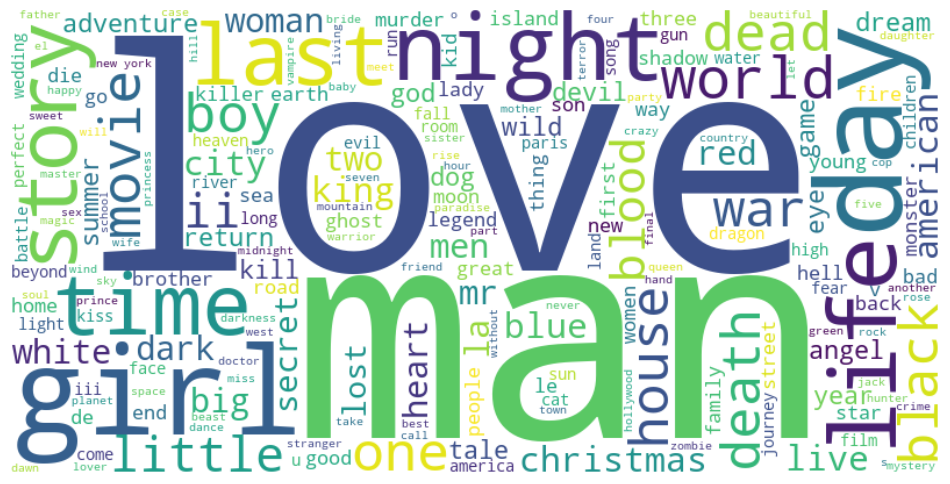

In [18]:
text = ' '.join(df_final['title'].apply(lambda x: x.lower()).values)  

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

# Visualizar 
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

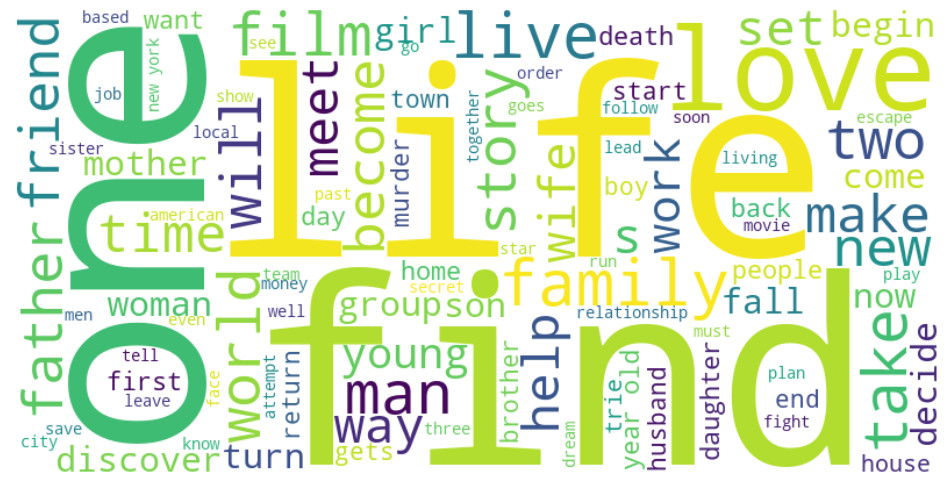

In [19]:
#Prepararamos los datos para generar la nube de palabras con la columna 'overview'
text = ' '.join(df_final['overview'].dropna().apply(lambda x: x.lower()).values)  

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Visualizar 
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()